In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

<IPython.core.display.Javascript object>


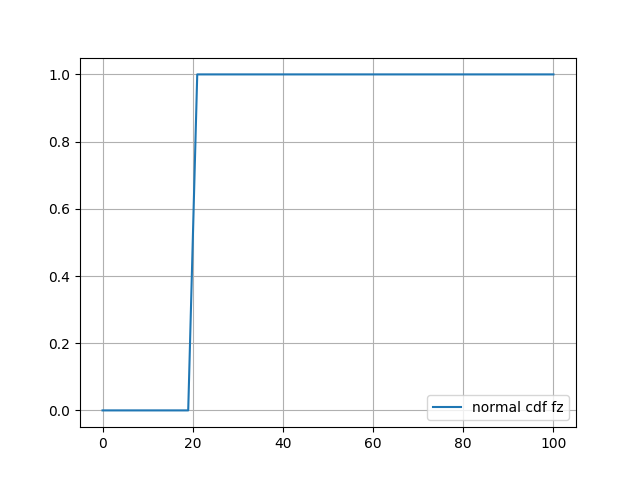

In [56]:
fmin = 20
std_fz = 0.1
vmax = 0.1
sdt_vz = 0.05
nfz = stats.norm(fmin,std_fz)
nvz = stats.norm(vmax,sdt_vz)

fz_arr = np.linspace(0,100,101)

plt.figure()
plt.plot(fz_arr, nfz.cdf(fz_arr), label='normal cdf fz')
plt.legend()
plt.grid()

In [57]:
class ContactDetection:

    def __init__(self, fmin, vmax, std_fz, std_vz, proba_thresh):
        self.std_fz = std_fz
        self.std_vz = std_vz
        self.nfz = stats.norm(fmin, std_fz)
        self.nvz = stats.norm(vmax, std_vz)
        self.proba_thresh = proba_thresh

    def contact_proba(self, fz, vz):
        """
        Try to fuse instantaneous feet force and velocity in world frame. 
        Floor assumed to be flat and orthogonal to Z.
        """
        Pfz = self.nfz.cdf(fz)
        Pvz = 1 - self.nvz.cdf(vz)

        # return (Pfz * Pvz) > self.proba_thresh
        return Pfz, Pvz, (Pfz * Pvz)
    
    def contact_detection(self, fz, vz):
        return self.contact_detection(fz, vz) > self.proba_thresh

<IPython.core.display.Javascript object>


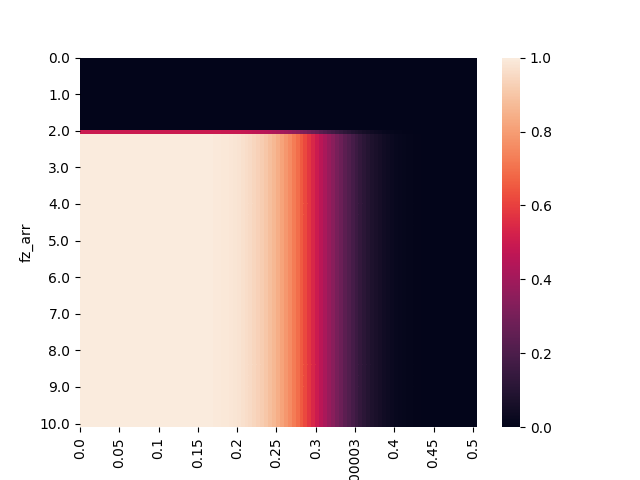

Text(50.722222222222214, 0.5, 'fz_arr')

In [63]:
fmin = 20
std_fz = 0.1
vmax = 0.3
sdt_vz = 0.05
cd = ContactDetection(fmin, vmax, std_fz, sdt_vz, 0.5)

N = 101
Prod_mat = np.zeros((N,N))
fz_arr = np.linspace(0, 100, N)
vz_arr = np.linspace(0, 0.5, N)
for i in range(N):
    fz = fz_arr[i]
    for j in range(N):
        vz = vz_arr[j]
        Prod_mat[i,j] = cd.contact_proba(fz,vz)[2]

f = plt.figure()
ax = plt.subplot(1,1,1)
sns.heatmap(Prod_mat)
ax.set_xticks(list(range(N))[::10])
ax.set_xticklabels(vz_arr[::10])
ax.set_yticks(list(range(N))[::10])
ax.set_yticklabels(fz_arr)
ax.set_xlabel('vz_arr')
ax.set_ylabel('fz_arr', rotation=90)

In [64]:
# 
dfz = np.mean(fz_arr[1:] - fz_arr[:-1])
dvz = np.mean(vz_arr[1:] - vz_arr[:-1])

np.sum(Prod_mat*dfz*dvz)

24.351227166853718